In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb

데이터 불러오기

In [2]:
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

인코딩 된 데이터 디코딩 하기

In [4]:
# word_index = imdb.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
# decoded_review

직접 원핫인코딩 하기

In [13]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

In [14]:
x_train.shape

(25000, 10000)

모델 구성하기

In [15]:
from tensorflow.keras import models, layers, Sequential

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# model.summary()

모델 컴파일 하기

In [16]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

옵티마이저, 손실, 측정함수 직접 설정하기

In [17]:
# from tensorflow.keras import optimizers, losses, metrics

# model.compile(optimizer = optimizers.RMSprop(lr=0.001),
#               loss = losses.binary_crossentropy, 
#               metrics = [metrics.binary_accuracy])

validation set 설정

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

훈련

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5217 - accuracy: 0.7777 - val_loss: 0.3886 - val_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3104 - accuracy: 0.8997 - val_loss: 0.3142 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2246 - accuracy: 0.9299 - val_loss: 0.2876 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1766 - accuracy: 0.9437 - val_loss: 0.2741 - val_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1422 - accuracy: 0.9549 - val_loss: 0.2830 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1179 - accuracy: 0.9639 - val_loss: 0.3022 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0993 - accuracy: 0.9711 - val_loss: 0.3122 - val_accuracy: 0.8840
Epoch 8/20
30

결과 시각화

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

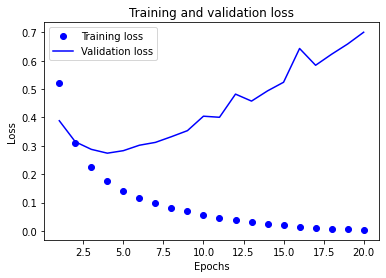

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

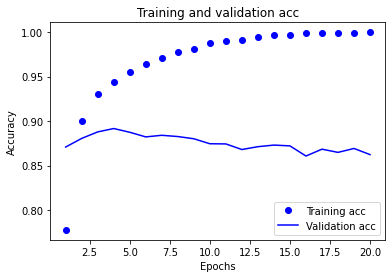

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

과적합 방지를 위해 epochs 수를 4로 낮추고 처음 부터 학습

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs = 4,
                   batch_size = 512)


Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4430 - accuracy: 0.8245
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2540 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1976 - accuracy: 0.9280
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1670 - accuracy: 0.9403


testset 활용하여 모델 정확도 측정

In [36]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 1ms/step - loss: 1.9832 - accuracy: 0.5010


[1.9831743240356445, 0.5009999871253967]

predict를 활용하여 실제 데이터에서 적용

In [32]:
model.predict(x_test)

array([[0.24337897],
       [0.999874  ],
       [0.97003525],
       ...,
       [0.13585363],
       [0.10870654],
       [0.77440864]], dtype=float32)